In [4]:
import pandas as pd
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
import ast 
from collections import ChainMap, Counter
import collections
import os # operating system
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # standard graphics
import seaborn as sns # fancier graphics
from scipy import stats
import sqlite3
from functools import reduce
from sklearn import preprocessing

import os # operating system
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # standard graphics
import seaborn as sns # fancier graphics
import statsmodels.api as sm
from scipy import stats
import sqlite3
from functools import reduce
from sklearn import preprocessing, datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OrdinalEncoder

In [5]:
#Set IDE display settings to display data properly 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
from google.colab import files
files.upload()

Saving UNCG500KTweets.csv to UNCG500KTweets (1).csv


{'UNCG500KTweets.csv': b'"","tweet.datetime","text","user.description","total.favorites","total.followers","total.friends","user.location","user.name","screen.name","total.statuses","tweet.mentions","retweet.mentions","url","retweet.url","total.retweets"\r\n"1",2021-12-08 15:57:18,"uncgadmiss heard uncg open state art esport arena month hub locat","Lecturer  UncgOf UNCG Department of Religious Studies American Religion  Technology  Embodiment",589,336,389,"Greensboro, NC","John W  Borchert","JohnWBorchert",338,"UNCGAdmissions","UNCGAdmissions",NA,"http://admissions.uncg.edu",2\r\n"2",2021-12-08 15:54:12,"forward think opt uncg","Lifelong North Carolinian  Mother  Educator  EdD  and Representative for NC House District 57  https   t co wgiHZXzIVd",5671,2603,772,"Greensboro, NC","Rep  Ashton Clemmons","Clemmons4NC",2634,"UNCG",NA,"https://twitter.com/uncgadmissions/status/1468596795228004355",NA,0\r\n"3",2021-12-08 15:50:32,"uncg uncgyfi uncg","",0,0,18,"","Amari","Amari41725533",122,"UN

In [6]:
UNCGTwitterDF=pd.read_csv("UNCG500KTweets.csv")
print(UNCGTwitterDF.shape)  

(2165, 16)


### **1st step. Data Cleaning**

In [7]:
def describe(df):
    return pd.concat([df.describe().T,                      
                      df.median().rename('median'),
                      df.mad().rename('mad'),
                      df.skew().rename('skew'),
                      df.kurt().rename('kurt')
                     ], axis=1).T

describe(UNCGTwitterDF)

,Unnamed: 0,total.favorites,total.followers,total.friends,total.statuses,total.retweets
count,2165.000000,2165.000000,2165.000000,2165.000000,2.165000e+03,2165.000000
mean,1083.000000,16365.594457,3609.537182,1428.010624,3.060481e+04,173.757968
std,625.125987,40280.460624,10423.793617,2496.311712,3.572910e+05,4271.491200
min,1.000000,0.000000,0.000000,0.000000,3.000000e+00,0.000000
25%,542.000000,923.000000,237.000000,204.000000,1.359000e+03,0.000000
50%,1083.000000,4535.000000,674.000000,678.000000,7.657000e+03,1.000000
75%,1624.000000,15825.000000,2076.000000,1878.000000,1.923700e+04,3.000000
max,2165.000000,813622.000000,153704.000000,39606.000000,1.620730e+07,137742.000000
median,1083.000000,4535.000000,674.000000,678.000000,7.657000e+03,1.000000
mad,541.249885,18901.528206,4650.750424,1335.299376,3.926307e+04,337.354437


In [8]:
UNCGTwitterDF.describe()

,Unnamed: 0,total.favorites,total.followers,total.friends,total.statuses,total.retweets
count,2165.000000,2165.000000,2165.000000,2165.000000,2.165000e+03,2165.000000
mean,1083.000000,16365.594457,3609.537182,1428.010624,3.060481e+04,173.757968
std,625.125987,40280.460624,10423.793617,2496.311712,3.572910e+05,4271.491200
min,1.000000,0.000000,0.000000,0.000000,3.000000e+00,0.000000
25%,542.000000,923.000000,237.000000,204.000000,1.359000e+03,0.000000
50%,1083.000000,4535.000000,674.000000,678.000000,7.657000e+03,1.000000
75%,1624.000000,15825.000000,2076.000000,1878.000000,1.923700e+04,3.000000
max,2165.000000,813622.000000,153704.000000,39606.000000,1.620730e+07,137742.000000


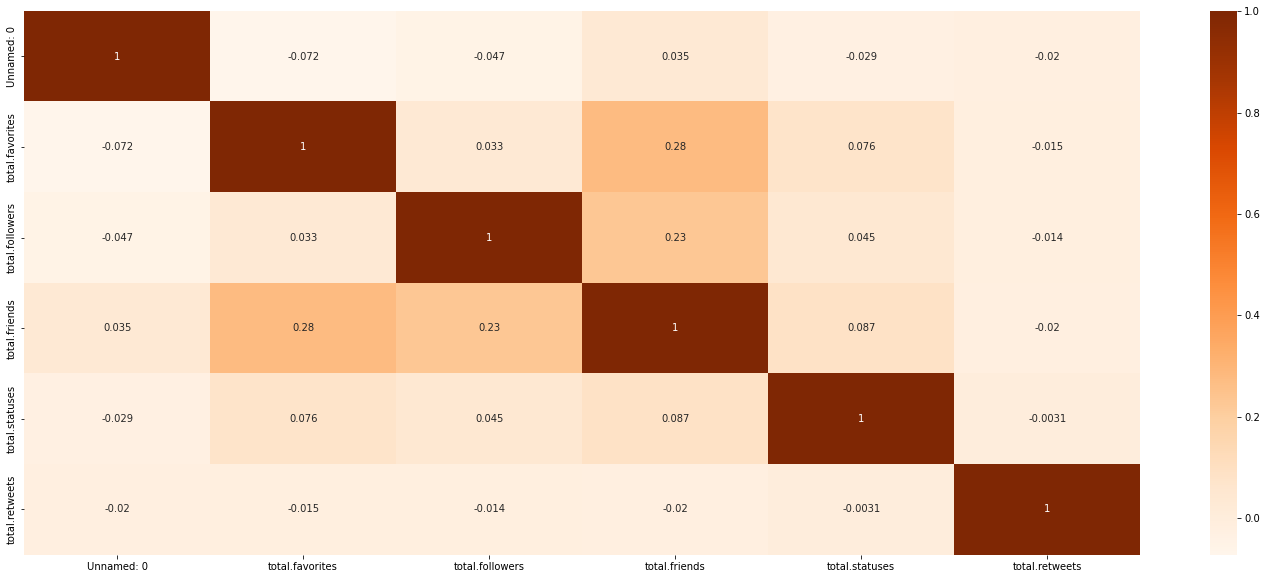

In [9]:
#Using Pearson Correlation Training Data Heatmap between variables 
plt.figure(figsize=(25,10))
cor = UNCGTwitterDF.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Oranges)
plt.show()

In [10]:
UNCGTwitterDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2165 entries, 0 to 2164
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        2165 non-null   int64 
 1   tweet.datetime    2165 non-null   object
 2   text              2160 non-null   object
 3   user.description  2013 non-null   object
 4   total.favorites   2165 non-null   int64 
 5   total.followers   2165 non-null   int64 
 6   total.friends     2165 non-null   int64 
 7   user.location     1580 non-null   object
 8   user.name         2165 non-null   object
 9   screen.name       2165 non-null   object
 10  total.statuses    2165 non-null   int64 
 11  tweet.mentions    1244 non-null   object
 12  retweet.mentions  921 non-null    object
 13  url               1093 non-null   object
 14  retweet.url       683 non-null    object
 15  total.retweets    2165 non-null   int64 
dtypes: int64(6), object(10)
memory usage: 270.8+ KB


#### Visualize the data to check how they spread in each data column and also verified any imbalance data.

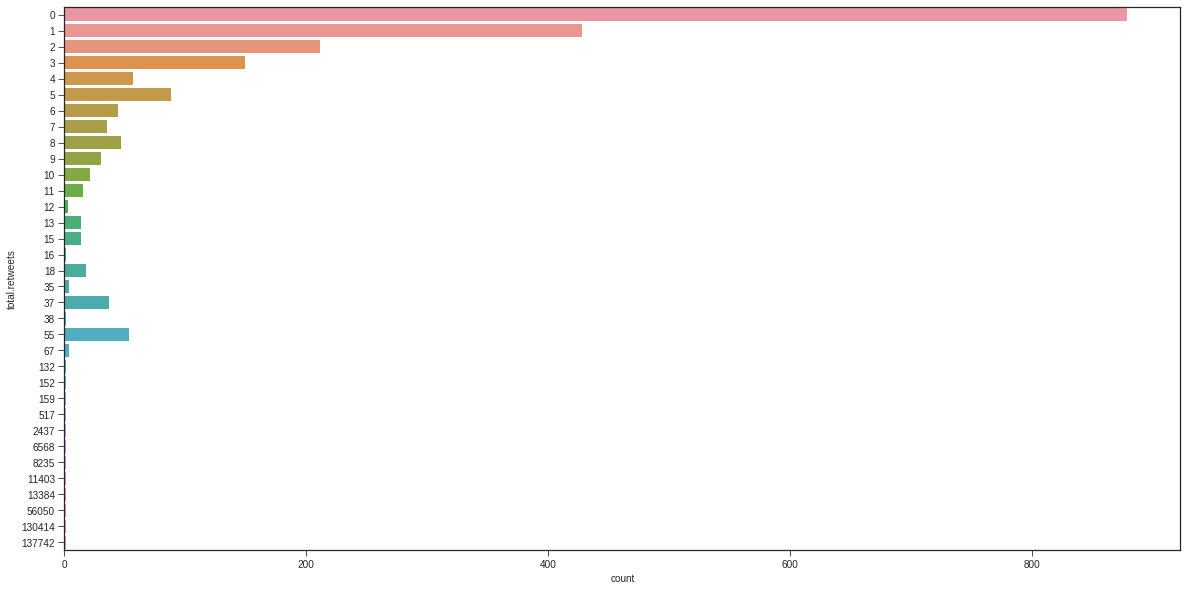

In [11]:
fig = plt.figure(figsize=(20,10))
plt.style.use('seaborn-ticks')
sns.countplot(y="total.retweets", data=UNCGTwitterDF)

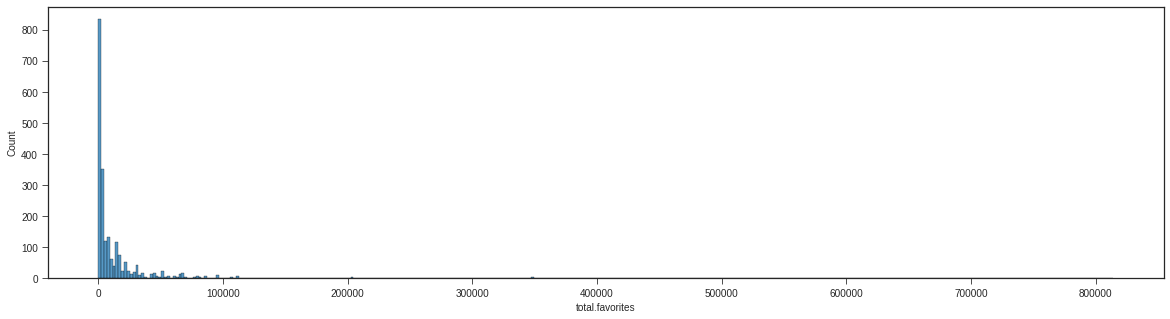

In [18]:
fig = plt.figure(figsize=(20,5))
plt.style.use('seaborn-ticks')
sns.histplot(x="total.favorites", data=UNCGTwitterDF)

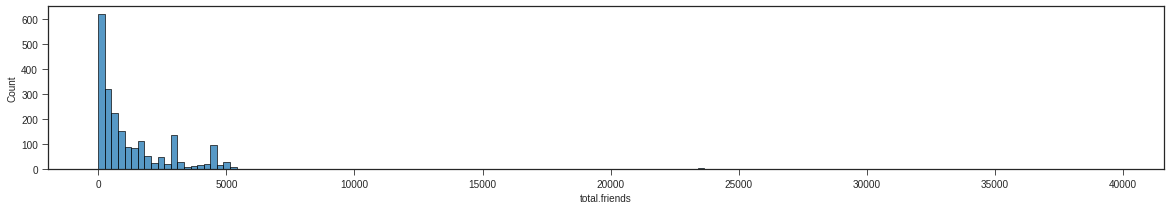

In [20]:
fig = plt.figure(figsize=(20,3))
plt.style.use('seaborn-ticks')
sns.histplot(x="total.friends", data=UNCGTwitterDF)

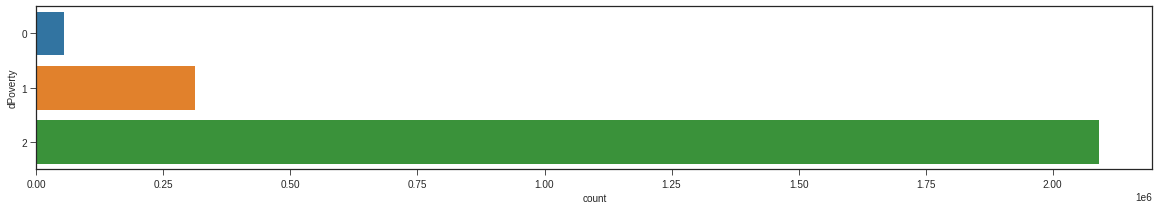

In [ ]:
fig = plt.figure(figsize=(20,3))
plt.style.use('seaborn-ticks')
sns.countplot(x="tweet.datetime", data=UNCGTwitterDF)

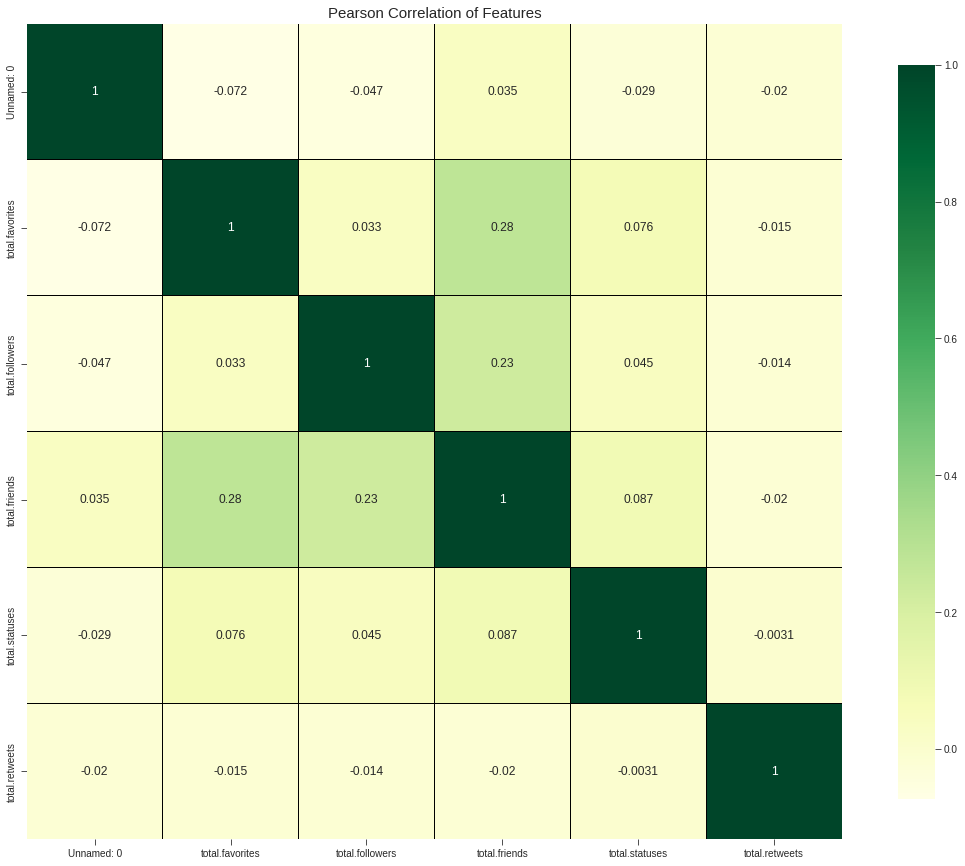

In [21]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(20, 15))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = "YlGn",
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='black',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(UNCGTwitterDF)

In [22]:
UNCGTwitterDF.tail()

,Unnamed: 0,tweet.datetime,text,user.description,total.favorites,total.followers,total.friends,user.location,user.name,screen.name,total.statuses,tweet.mentions,retweet.mentions,url,retweet.url,total.retweets
2160,2161,2021-11-29 17:37:04,mfagreensboro uncg mfa write program alum mich...,NaN,923,14111,790,"Greensboro, NC",TheGreensboroReview,greensbororevie,9003,mfagreensboro,mfagreensboro,NaN,http://mfagreensboro.org,3
2161,2162,2021-11-29 17:37:00,mfagreensboro uncg mfa write program alum mich...,Director mfagreensboro Editor of greensboro...,31276,3335,2421,"Greensboro, NC",Terry L Kennedy,terrylkennedy,34939,mfagreensboro,mfagreensboro,NaN,http://mfagreensboro.org,3
2162,2163,2021-11-29 17:36:25,mfagreensboro uncg mfa write program alum mich...,UNCG ENG lecturer Book Recommendations Edit...,2814,210,1210,"Greensboro, NC",Michael Pittard,MichaelTPittard,987,mfagreensboro,mfagreensboro,NaN,http://mfagreensboro.org,3
2163,2164,2021-11-29 17:21:40,seanpaulcbb top socon good furman chattanooga ...,Follower of Christ ETSU grad US Navy...,29236,212,466,"Tennessee, USA",Bucky Stutters,BuckyStutters,8731,SeanPaulCBB,SeanPaulCBB,NaN,NaN,7
2164,2165,2021-11-29 17:14:47,hey fgreensboro free tix uncg elon coliseum to...,Accomplisher,4025,264,204,"Greensboro, NC",Nick Aceves,f3Poehler,1348,F3Greensboro,NaN,https://twitter.com/i/web/status/1465368654934...,NaN,1


### **2 Step.Encode, Feature Selection, Balance Data, Scaling, Transformation**

In [23]:
from sklearn.cluster import KMeans
from matplotlib import cm
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score

from sklearn.decomposition import PCA
from pandas.plotting import scatter_matrix
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import GridSearchCV


#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
#train,test=train_test_split(train_df,test_size=0.2,random_state=0,stratify=abalone_data['Sex'])

In [24]:
# Feature Selection and Encoding
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split #training and testing data split

In [25]:
UNCGTwitterDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2165 entries, 0 to 2164
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        2165 non-null   int64 
 1   tweet.datetime    2165 non-null   object
 2   text              2160 non-null   object
 3   user.description  2013 non-null   object
 4   total.favorites   2165 non-null   int64 
 5   total.followers   2165 non-null   int64 
 6   total.friends     2165 non-null   int64 
 7   user.location     1580 non-null   object
 8   user.name         2165 non-null   object
 9   screen.name       2165 non-null   object
 10  total.statuses    2165 non-null   int64 
 11  tweet.mentions    1244 non-null   object
 12  retweet.mentions  921 non-null    object
 13  url               1093 non-null   object
 14  retweet.url       683 non-null    object
 15  total.retweets    2165 non-null   int64 
dtypes: int64(6), object(10)
memory usage: 270.8+ KB


In [26]:
UNCGTwitterDFEncode = UNCGTwitterDF.apply(lambda col: LabelEncoder().fit_transform(col.astype(str)), axis=0, result_type='expand')
UNCGTwitterDFEncode.head()

,Unnamed: 0,tweet.datetime,text,user.description,total.favorites,total.followers,total.friends,user.location,user.name,screen.name,total.statuses,tweet.mentions,retweet.mentions,url,retweet.url,total.retweets
0,0,2156,1095,501,749,421,482,137,426,283,545,185,102,919,4,16
1,1111,2155,335,508,741,328,710,137,682,123,434,184,183,901,127,0
2,1388,2154,1092,911,0,0,217,388,61,34,96,184,183,919,127,0
3,1499,2153,1184,911,0,0,217,388,61,34,96,218,183,919,127,0
4,1610,2152,809,747,880,427,179,143,835,534,290,145,183,919,127,0


### Feature Selection using Forward Selection, BackWard Selection

In [27]:
y_train = UNCGTwitterDFEncode['total.retweets']
X_train = UNCGTwitterDFEncode.drop(['total.retweets'], axis=1)
y_test = UNCGTwitterDFEncode["total.retweets"]
X_test = UNCGTwitterDFEncode.drop(['total.retweets'], axis=1)
print("Train Columns",X_train.columns)
print("Size Train", X_train.shape, y_train.shape)
print("Size Test", X_test.shape, y_test.shape)

Train Columns Index(['Unnamed: 0', 'tweet.datetime', 'text', 'user.description', 'total.favorites', 'total.followers', 'total.friends', 'user.location', 'user.name', 'screen.name', 'total.statuses', 'tweet.mentions', 'retweet.mentions', 'url', 'retweet.url'], dtype='object')
Size Train (2165, 15) (2165,)
Size Test (2165, 15) (2165,)


##### Feature Selection using Forward Selection, BackWard Selection

In [28]:
target= UNCGTwitterDFEncode['total.retweets']

def forward_selection(UNCGTwitterDFEncode, target, significance_level=0.05):
    initial_features = UNCGTwitterDFEncode.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(UNCGTwitterDFEncode[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

forward_selection(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


['retweet.url',
 'retweet.mentions',
 'user.description',
 'total.statuses',
 'url',
 'tweet.datetime']

In [29]:
def backward_elimination(UNCGTwitterDFEncode, target,significance_level = 0.05):
    features = UNCGTwitterDFEncode.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(UNCGTwitterDFEncode[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break 
    return features

backward_elimination(X_train,y_train)

['tweet.datetime',
 'user.description',
 'total.statuses',
 'retweet.mentions',
 'url',
 'retweet.url']

### 3&4 Steps:Check Imbalance data based on Income Spread. Observed that 50% data shows income=0 and 23% its <15000 and 16% <30000, 10% <60000, 2% >=60000. Which is imbalanced data

In [ ]:
#Checking If data is Imbalance
UNCGTwitterDFEncode.dIncome1.value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

0    50.34%
1    22.97%
2     15.3%
3     9.45%
4     1.94%
Name: dIncome1, dtype: object

In [51]:
SelectedNames =['tweet.datetime',
 'user.description',
 'total.statuses',
 'retweet.mentions',
 'url',
 'retweet.url',
 'total.retweets']
UNCGTwitterDFEncode = UNCGTwitterDF[SelectedNames].apply(lambda col: LabelEncoder().fit_transform(col.astype(str)), axis=0, result_type='expand')
UNCGTwitterDFEncode.head()

,tweet.datetime,user.description,total.statuses,retweet.mentions,url,retweet.url,total.retweets
0,2156,501,545,102,919,4,16
1,2155,508,434,183,901,127,0
2,2154,911,96,183,919,127,0
3,2153,911,96,183,919,127,0
4,2152,747,290,183,919,127,0


##### Using Minmax Scaler Train and Test data transformed

In [52]:
#Data normalization - Feature Scaling
#scaler = StandardScaler()
#scaler.fit(X_train)
#X_train_scaled = scaler.transform(X_train)
#X_test_scaled = scaler.transform(X_test)
#sc = StandardScaler()
#X_train_std = sc.fit_transform(X_train)
#pca = PCA(n_components=None)
#x_train_pca = pca.fit_transform(X_train_std)
#a = pca.explained_variance_ratio_
#a_running = a.cumsum()
#a_running

from sklearn.preprocessing import MinMaxScaler

def feature_scaling(X_train, X_test):
    scaler = MinMaxScaler()

    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train.astype(np.float)), 
                                  index=X_train.index, columns=X_train.columns)

    X_test_scaled = pd.DataFrame(scaler.transform(X_test.astype(np.float)),
                                 index=X_test.index, columns=X_test.columns)
    
    return X_train_scaled, X_test_scaled

X_train_scaled, X_test_scaled = feature_scaling(X_train, X_test)

In [ ]:
#Handle Imbalance data by Oversampling/Undersampling
from imblearn.over_sampling import SMOTE

def handle_imbalance_data(X_train, y_train):
    unique, counts = np.unique(y_train, return_counts=True)  
    print(f'Before Resampling Values count of Target Class(0/1) in Training dataset\n{dict(zip(unique, counts))}\n')
    sm = SMOTE(random_state=20)
    X_train_rs, y_train_rs = sm.fit_resample(X_train, y_train)
    unique, counts = np.unique(y_train_rs, return_counts=True)    
    print(f'After Resampling Values count of Target Class(0/1) in Training dataset\n{dict(zip(unique, counts))}')
    return X_train_rs, y_train_rs 

X_train, y_train = handle_imbalance_data(X_train_scaled, y_train)

Before Resampling Values count of Target Class(0/1) in Training dataset
{0: 1237403, 1: 564755, 2: 376031, 3: 232422, 4: 47674}

After Resampling Values count of Target Class(0/1) in Training dataset
{0: 1237403, 1: 1237403, 2: 1237403, 3: 1237403, 4: 1237403}


##### Principal Component Analysis(PCA)

In [53]:
#Principal Component Analysis (PCA)
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

### **5 Step.Building Machine Learning Model(RandomForest) and compared other models**

#### Perception Method

In [54]:
## Perceptron Method
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=1, random_state=1)
ppn.fit(X_train, y_train)

Perceptron(eta0=1, random_state=1)

In [55]:
y_pred = ppn.predict(X_test_scaled)
acc_perception = round(ppn.score(X_train, y_train) * 100, 2)
accuracy_score(y_pred,y_test)

0.40600461893764433

#### Random Forest Model

In [56]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)

#y_pred = randomforest.predict(X_test)
score_randomforest = randomforest.score(X_test_scaled,y_test)
print('The accuracy of the Random Forest Model is', score_randomforest)

The accuracy of the Random Forest Model is 0.03094688221709007


#### Gaussian Naive Bayes Model

In [57]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
# y_pred = gaussian.predict(X_test)
score_gaussian = gaussian.score(X_test_scaled,y_test)
print('The accuracy of Gaussian Naive Bayes is', score_gaussian)

The accuracy of Gaussian Naive Bayes is 0.020323325635103928


#### SVM Model 

In [58]:
# Support Vector Classifier (SVM/SVC)
from sklearn.svm import SVC
svc = SVC(gamma=0.22)
svc.fit(X_train, y_train)
#y_pred = logreg.predict(X_test)
score_svc = svc.score(X_test_scaled,y_test)
print('The accuracy of SVC is', score_svc)

The accuracy of SVC is 0.40600461893764433


#### Logistic Regression Model

In [59]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
#y_pred = logreg.predict(X_test)
score_logreg = logreg.score(X_test_scaled,y_test)
print('The accuracy of the Logistic Regression is', score_logreg)

The accuracy of the Logistic Regression is 0.40600461893764433


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


#### KNN Model 

In [60]:
# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
#y_pred = knn.predict(X_test)
score_knn = knn.score(X_test_scaled,y_test)
print('The accuracy of the KNN Model is',score_knn)

The accuracy of the KNN Model is 0.40600461893764433


#### Decision Tree Model

In [61]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test_scaled)
score_decisionTree = decision_tree.score(X_test_scaled,y_test)
print('The accuracy of the Decision Tree Model is',score_decisionTree)

The accuracy of the Decision Tree Model is 0.06882217090069284


### **6 Step.Domain Expert to choose best model. It shows that Random forest with high accuracy**

In [62]:
#Plotting the accuracy of the used algorithms to find the best fit
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 'Random Forest', 'Naive Bayes', 'Decision Tree'],
    'Score': [score_svc, score_knn, score_logreg, score_randomforest, score_gaussian,score_decisionTree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(8)

,Model
Score,
0.406005,Support Vector Machines
0.406005,KNN
0.406005,Logistic Regression
0.068822,Decision Tree
0.030947,Random Forest
0.020323,Naive Bayes


#### Linear Regression Model 

In [63]:
# Split the data into training/testing sets
UNCGTwitterDFTrain_Y=UNCGTwitterDFEncode[['total.retweets']] 

# Split the targets into training/testing sets
UNCGTwitterDFTrain_X=UNCGTwitterDFEncode[[
 'retweet.mentions',
 'user.description',
 'total.statuses',
 'tweet.datetime']]
# Create linear regression object
regr4 = linear_model.LinearRegression()

# Train the model using the training sets
regr4.fit(UNCGTwitterDFTrain_X, UNCGTwitterDFTrain_Y)

# Split the data into training/testing sets
UNCGTwitterDFTest_Y=UNCGTwitterDFEncode[['total.retweets']] 

# Split the targets into training/testing sets
UNCGTwitterDFTest_X=UNCGTwitterDFEncode[[
 'retweet.mentions',
 'user.description',
 'total.statuses',
 'tweet.datetime']]
# Make predictions using the testing set
UNCGTwitterDF_Y_Pred = regr4.predict(UNCGTwitterDFTest_X)

Intercept: 
 [18.1868659]
Coefficients: 
 [[-0.0856737   0.00350465  0.00394075 -0.0004241 ]]
Mean squared error: 88.65
Mean Absolute Error: 7.87
Root Mean squared Error: 9.42
Coefficient of determination: 0.20


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


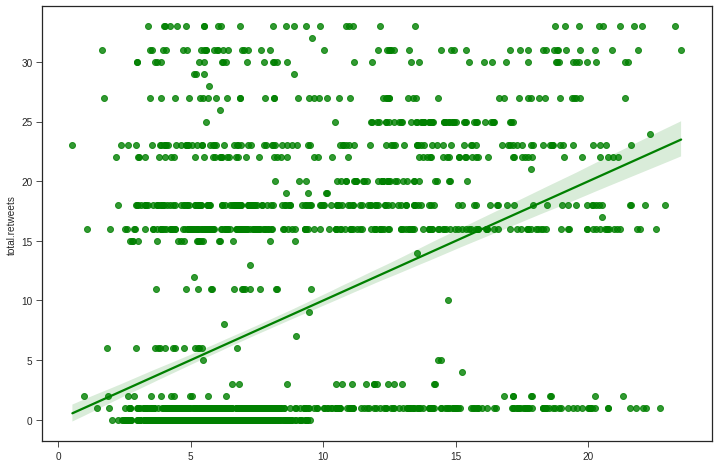

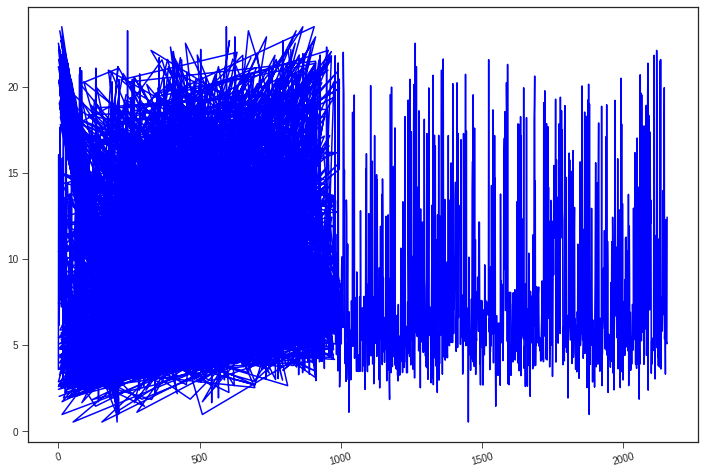

In [66]:
# The Intercept
print('Intercept: \n', regr4.intercept_)

# The coefficients
print('Coefficients: \n', regr4.coef_)

# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(UNCGTwitterDFTest_Y, UNCGTwitterDF_Y_Pred))

# The coefficient of determination: 1 is perfect prediction
print('Mean Absolute Error: %.2f' % mean_absolute_error(UNCGTwitterDFTest_Y, UNCGTwitterDF_Y_Pred))

# The coefficient of determination: 1 is perfect prediction
print('Root Mean squared Error: %.2f' % np.sqrt(mean_squared_error(UNCGTwitterDFTest_Y, UNCGTwitterDF_Y_Pred)))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(UNCGTwitterDFTest_Y, UNCGTwitterDF_Y_Pred))

# Plot outputs
plt.figure(figsize=(12,8))
sns.regplot(UNCGTwitterDF_Y_Pred,UNCGTwitterDFTest_Y, color='g')
plt.show()

plt.figure(figsize=(12,8))
plt.plot(UNCGTwitterDFTest_X, UNCGTwitterDF_Y_Pred, color='b')
plt.xticks(rotation=15)
plt.show()

Text(0.5, 0, 'Random Forest Feature Importance')

<Figure size 1440x720 with 0 Axes>

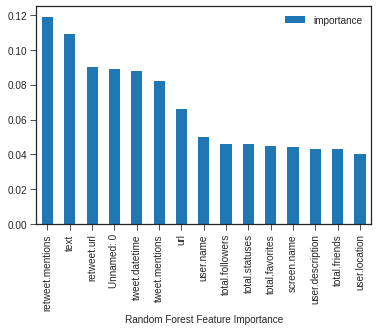

In [46]:
fig = plt.figure(figsize=(20,10))
plt.style.use('seaborn-ticks')
importances.plot.bar()
plt.xlabel("Random Forest Feature Importance")